In [ ]:
!pip install numpy


In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import pandas as pd

df= pd.read_csv('/content/placement.csv')

df = df.iloc[:,1:]
df



,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


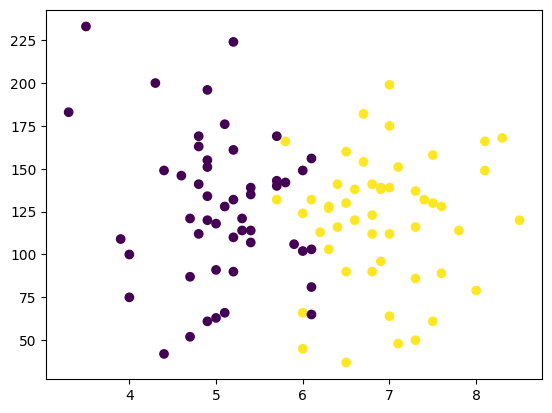

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]


,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

y_test

,placement
88,0
17,0
10,1
1,0
64,1
30,1
5,1
47,0
91,1
58,1


In [ ]:
y_train

,placement
11,1
49,0
6,0
96,0
94,0
...,...
69,1
35,1
38,1
81,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_test

array([[-1.23858424,  0.76614574],
       [-1.99549682,  1.47207948],
       [-0.13762047, -1.39318101],
       [-0.20643071, -0.12665282],
       [ 0.55048188, -0.99868862],
       [ 0.96334329,  0.33012784],
       [ 0.61929212, -1.33089274],
       [-0.68810235,  1.01529883],
       [ 0.89453306,  0.95301055],
       [ 1.23858424, -0.68724726]])

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#clf.predict(x_test)
y_pred = clf.predict(x_test)

In [ ]:
y_test


,placement
88,0
17,0
10,1
1,0
64,1
30,1
5,1
47,0
91,1
58,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9

<Axes: >

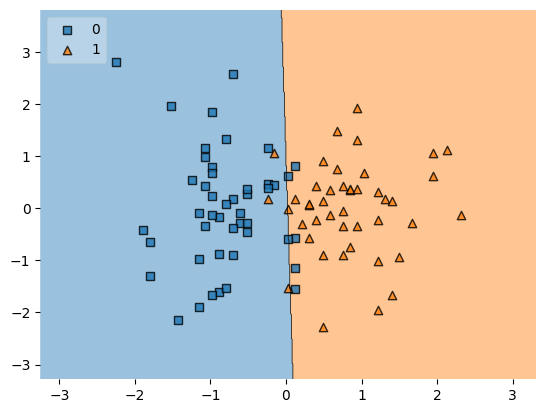

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))